In [15]:
import re
import pickle
import string
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YongLe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\YongLe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# Only for submission to Kaggle to see scores
# df = pd.read_csv('test.csv')
# df = df[['id', 'text']]
# STOPWORDS = set(nltk.corpus.stopwords.words('english'))
# df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
# df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
# df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
# df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# df['char_count'] = df['text'].apply(lambda x: len(str(x)))
# df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
# df['url_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
# df['hashtag_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
# df['mention_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

# # Do a brief cleaning of the data
# df['text'] = [re.sub('\s+', ' ', x) for x in df['text']] # This removes all extra spaces
# df['text'] = [x.lower() for x in df['text']] # lowercase 

# # Combine correlated features
# df['word_unique_ratio'] = df['unique_word_count'] / df['word_count']
# df.drop(['word_count', 'unique_word_count'], axis=1, inplace=True)

# # Load the model stacking_model.sav
# model = pickle.load(open('stacking_model_2.sav', 'rb'))

# # Make predictions
# predictions = model.predict(df)

# # Save the predictions to a csv file
# df = pd.DataFrame({'id': df['id'], 'target': predictions})
# df.to_csv('submission_2.csv', index=False) # Retrained model is 0.1 weaker than the first one

In [3]:
# Load the data from tweets.json
df = pd.read_json('tweets.json', lines=True)

# Print the first 5 rows of data
df.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,card,viewCount,vibe,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username
0,snscrape.modules.twitter.Tweet,https://twitter.com/JtrOmar/status/16231076774...,2023-02-07 23:53:20+00:00,No tientes! https://t.co/UD3YSYis3j,No tientes! https://t.co/UD3YSYis3j,1623107677483159552,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,7.0,NaN,No tientes! https://t.co/UD3YSYis3j,[],,[],,JtrOmar
1,snscrape.modules.twitter.Tweet,https://twitter.com/LastQuake/status/162310355...,2023-02-07 23:36:57+00:00,‼ No further info about this #earthquake will ...,‼ No further info about this #earthquake will ...,1623103555031769089,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,{'_type': 'snscrape.modules.twitter.SummaryCar...,3713.0,NaN,‼ No further info about this #earthquake will ...,[https://www.emsc-csem.org/service/application...,https://www.emsc-csem.org/service/application/...,"[https://t.co/LBaVNedgF9, https://t.co/z6tAk3S...",https://t.co/LBaVNedgF9 https://t.co/z6tAk3SAC...,LastQuake
2,snscrape.modules.twitter.Tweet,https://twitter.com/biket_a/status/16231014105...,2023-02-07 23:28:26+00:00,@luz_marcha Good night 🙏❤️,@luz_marcha Good night 🙏❤️,1623101410559643649,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,9.0,NaN,@luz_marcha Good night 🙏❤️,[],,[],,biket_a
3,snscrape.modules.twitter.Tweet,https://twitter.com/biket_a/status/16231013208...,2023-02-07 23:28:05+00:00,@ChrisHowley6 Clever girl 😂,@ChrisHowley6 Clever girl 😂,1623101320864342016,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,...,NaN,None,17.0,NaN,@ChrisHowley6 Clever girl 😂,[],,[],,biket_a
4,snscrape.modules.twitter.Tweet,https://twitter.com/biket_a/status/16231010354...,2023-02-07 23:26:57+00:00,"@FlirtyFlightB2 Beautiful,,😘","@FlirtyFlightB2 Beautiful,,😘",1623101035496501251,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,None,19.0,NaN,"@FlirtyFlightB2 Beautiful,,😘",[],,[],,biket_a


In [4]:
# Keep only date and renderedContent columns
df = df[['date', 'renderedContent']]
df.columns = ['date', 'text']
df.head()

,date,text
0,2023-02-07 23:53:20+00:00,No tientes! https://t.co/UD3YSYis3j
1,2023-02-07 23:36:57+00:00,‼ No further info about this #earthquake will ...
2,2023-02-07 23:28:26+00:00,@luz_marcha Good night 🙏❤️
3,2023-02-07 23:28:05+00:00,@ChrisHowley6 Clever girl 😂
4,2023-02-07 23:26:57+00:00,"@FlirtyFlightB2 Beautiful,,😘"


In [5]:
# Create meta features from text
STOPWORDS = set(nltk.corpus.stopwords.words('english'))
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Do a brief cleaning of the data
df['text'] = [re.sub('\s+', ' ', x) for x in df['text']] # This removes all extra spaces
df['text'] = [x.lower() for x in df['text']] # lowercase 

# Combine correlated features
df['word_unique_ratio'] = df['unique_word_count'] / df['word_count']
df.drop(['word_count', 'unique_word_count'], axis=1, inplace=True)

df.head()


,date,text,stop_word_count,mean_word_length,char_count,punctuation_count,word_unique_ratio
0,2023-02-07 23:53:20+00:00,no tientes! https://t.co/ud3ysyis3j,1,11.000000,35,6,1.0
1,2023-02-07 23:36:57+00:00,‼ no further info about this #earthquake will ...,7,8.647059,163,16,1.0
2,2023-02-07 23:28:26+00:00,@luz_marcha good night 🙏❤️,0,5.750000,26,2,1.0
3,2023-02-07 23:28:05+00:00,@chrishowley6 clever girl 😂,0,6.000000,27,1,1.0
4,2023-02-07 23:26:57+00:00,"@flirtyflightb2 beautiful,,😘",0,13.500000,28,3,1.0


In [6]:
# Load the model stacking_model.sav
model = pickle.load(open('stacking_model.sav', 'rb'))

In [7]:
# Define X
features = df.drop('date', axis=1).columns
X = df[features]

# Predict positive or negative label
y_pred = model.predict(X)

# Add the prediction to the dataframe
df['prediction'] = y_pred

# Print the first 5 rows of the dataframe
df.head()

,date,text,stop_word_count,mean_word_length,char_count,punctuation_count,word_unique_ratio,prediction
0,2023-02-07 23:53:20+00:00,no tientes! https://t.co/ud3ysyis3j,1,11.000000,35,6,1.0,0
1,2023-02-07 23:36:57+00:00,‼ no further info about this #earthquake will ...,7,8.647059,163,16,1.0,1
2,2023-02-07 23:28:26+00:00,@luz_marcha good night 🙏❤️,0,5.750000,26,2,1.0,0
3,2023-02-07 23:28:05+00:00,@chrishowley6 clever girl 😂,0,6.000000,27,1,1.0,0
4,2023-02-07 23:26:57+00:00,"@flirtyflightb2 beautiful,,😘",0,13.500000,28,3,1.0,0


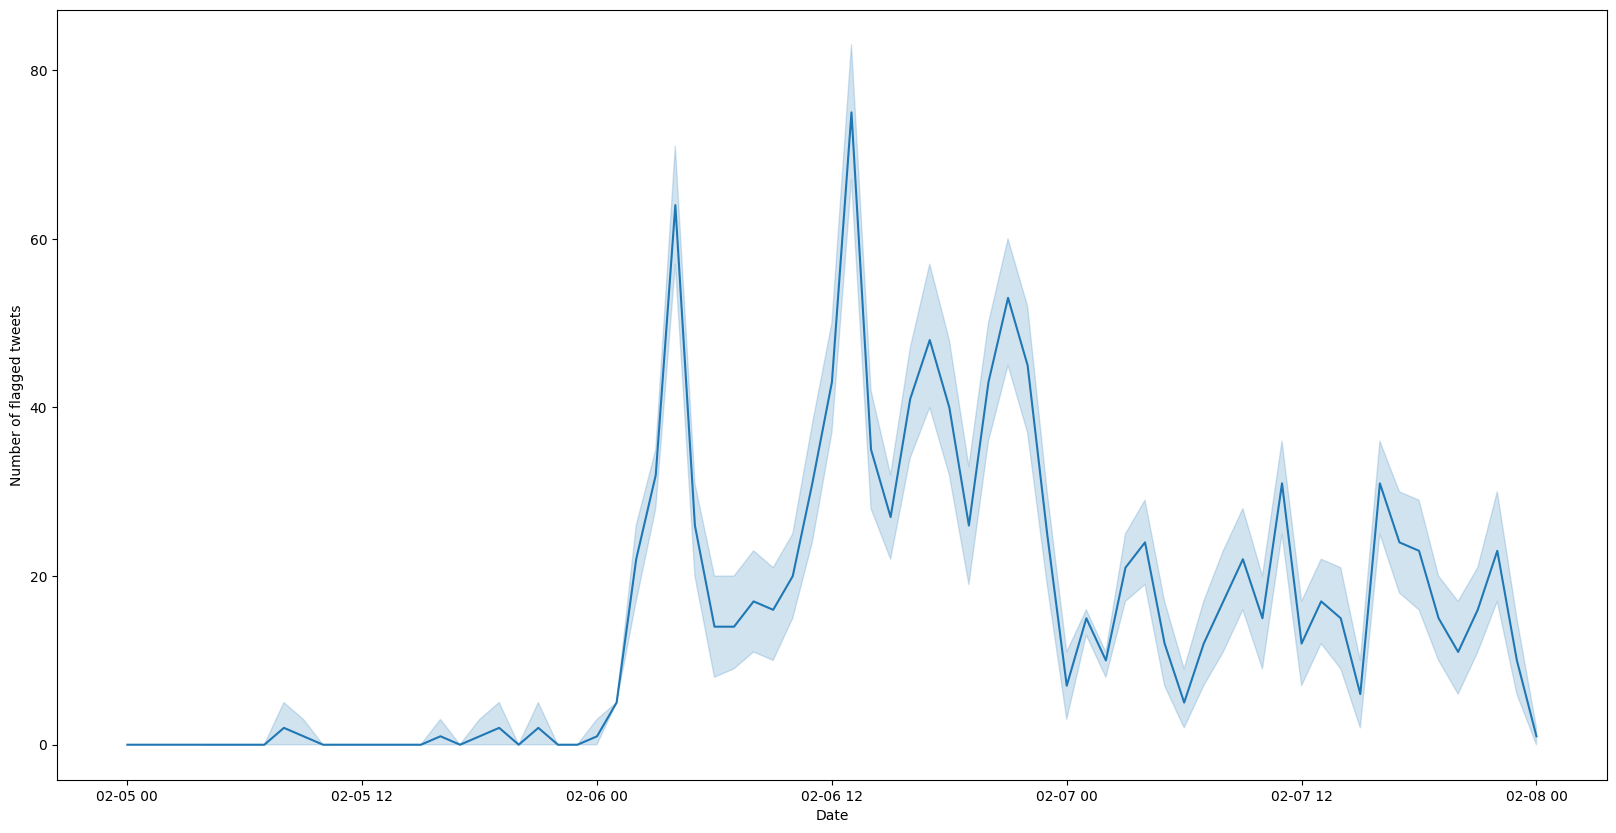

In [8]:
# Plot the predictions over time by hour
df['date'] = pd.to_datetime(df['date'])
df['date_hour'] = df['date'].dt.round('H')

# Plot a smooth line of the sum of positive predictions with seaborn
plt.figure(figsize=(20,10))
sns.lineplot(x='date_hour', y='prediction', data=df, estimator=sum)

# Axis labels
plt.xlabel('Date')
plt.ylabel('Number of flagged tweets')
plt.show()


In [9]:
# Priority tweets with predict proba
df['prediction_proba'] = model.predict_proba(X)[:,1]
# Priority are those above 0.911

df['priority'] = df['prediction_proba'].apply(lambda x: 1 if x > 0.80 else 0)

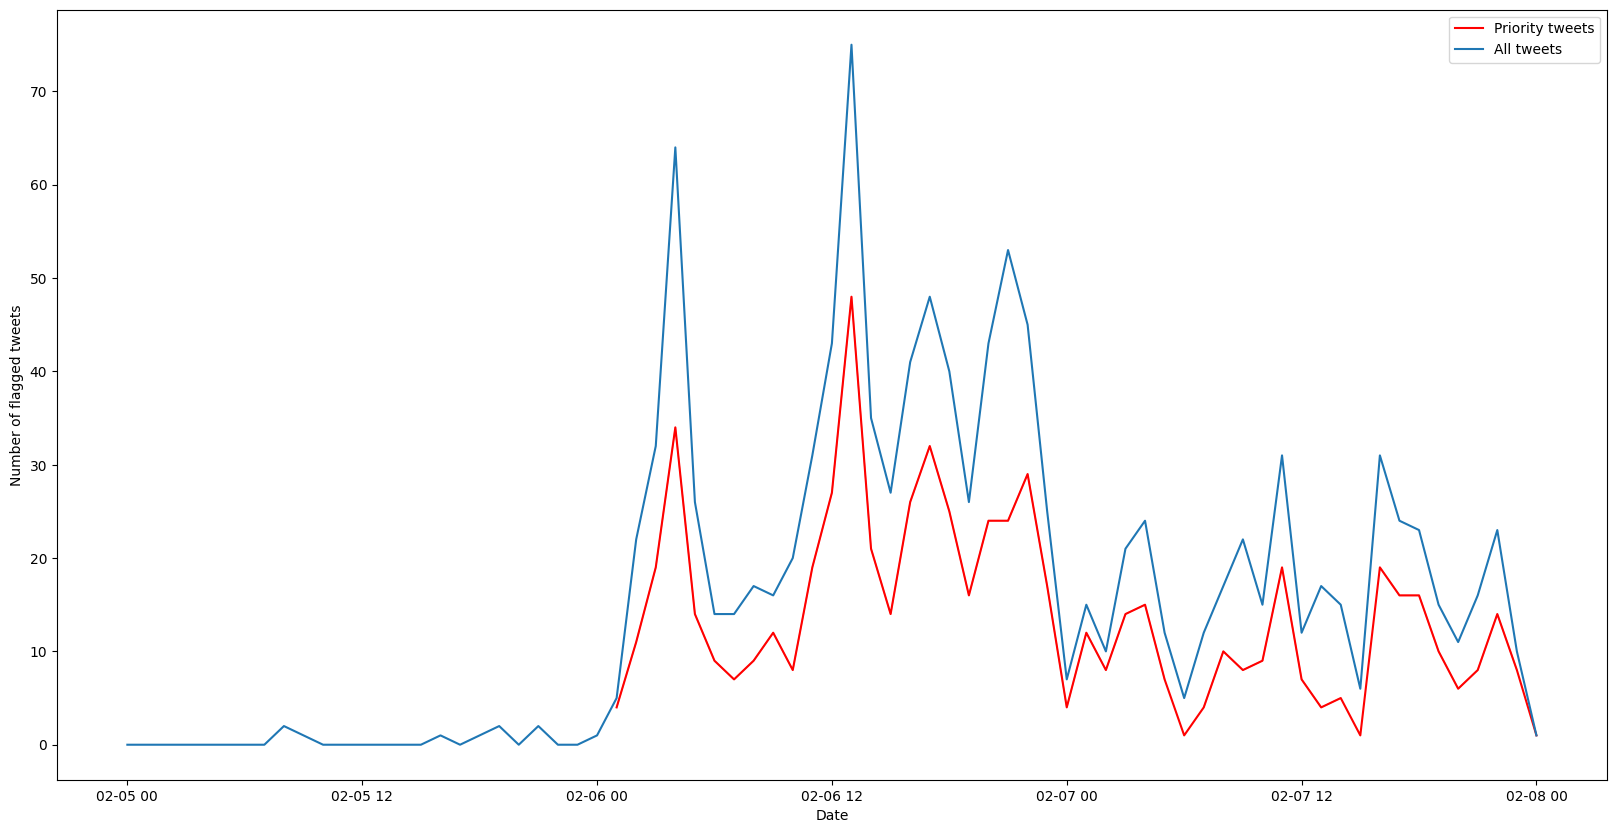

In [10]:
# Plot the same seaborn but with priority tweets 
plt.figure(figsize=(20,10))
sns.lineplot(x='date_hour', y='priority', data=df[df['priority'] == 1], estimator=sum, color='red', label='Priority tweets')
sns.lineplot(x='date_hour', y='prediction', data=df, estimator=sum, errorbar=None, label='All tweets')
plt.legend()

# Axis labels
plt.xlabel('Date')
plt.ylabel('Number of flagged tweets')

plt.show()

In [14]:
# Use Plotly Go
import plotly.graph_objects as go

df2 = df.groupby('date_hour').agg({'prediction': 'sum', 'priority': 'sum'}).reset_index()
df2['priority'] = df2['priority'].apply(lambda x: np.nan if x == 0 else x)

# Create a figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['date_hour'], y=df2['prediction'], mode='lines+markers', name='All positive tweets'))
fig.add_trace(go.Scatter(x=df2['date_hour'], y=df2['priority'], mode='lines+markers', name='Priority tweets'))
fig.update_layout(title='Number of flagged tweets over time',
                     xaxis_title='Date',
                        yaxis_title='Number of flagged tweets')
fig.update_traces(hovertemplate='Date: %{x}<br>Number of flagged tweets: %{y}')
fig.show()



In [16]:
# Show the earliest 5 priority tweets without the meta_features 
df[df['priority'] == 1].drop(list(features.drop('text')) + ['prediction', 'date_hour', 'priority'], axis=1).sort_values('date').head()

,date,text,prediction_proba
1860,2023-02-06 01:18:56+00:00,❗ deprem uyarisi / earthquake warning for turkey (#deprem reported near #kösreli?) — note: alerts/reports will end soon because twitter will remove its free api; see my profile. (twitter),0.886409
1859,2023-02-06 01:19:42+00:00,⚠preliminary info: #earthquake (#deprem) about 30 km n of #mercin (#turkey) 2 min ago (local time 04:17:48)❗magnitude not available yet❗updates at: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu 🖥emsc-csem.org https://t.co/dp1gz3dmnt,0.803254
1858,2023-02-06 01:21:33+00:00,⚠preliminary info: m7.2 #earthquake (#deprem) about 30 km n of #mercin (#turkey) 4 min ago (local time 04:17:48). updates at: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu 🖥emsc-csem.org https://t.co/4nrruubacj,0.810901
1856,2023-02-06 01:22:58+00:00,#earthquake 26 km nw of #gaziantep (#turkey) 5 min ago (local time 04:17:35). colored dots represent local shaking &amp; damage level reported by eyeswitnesses. share your experience via: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu/?id=1218444 https://t.co/vwwekb88si,0.807213
1855,2023-02-06 01:30:05+00:00,breaking: powerful 7.8-magnitude earthquake hits near gaziantep in southern turkey - usgs,0.865558


In [41]:
# Show tweets that are low in confidence but still positive on 5 feb near midnight
df[(df['prediction'] == 1) & (df['prediction_proba'] < 0.70) & (df['date'] > '2023-02-05 18:00:00') & (df['date'] < '2023-02-06 01:17:00')].drop(list(features.drop('text')) + ['date_hour', 'priority'], axis=1).sort_values('date')

,date,text,prediction,prediction_proba
1928,2023-02-05 18:34:35+00:00,"two days in #gaziantep: industrial, gastronomical and cultural must-have in turkey. special thanks to honorary consul @mehparekileci 🇮🇹🇹🇷 https://t.co/e6tr1nzjgi",1,0.545322
1894,2023-02-05 20:41:36+00:00,"continue to be illegally deployed to the territory of azerbaijan in violation of paragraph 4 of the said trilateral statement, and the transfer of weapons and ammunition. transfer of land-mines through the lachin road with their subsequent planting on the sovereign territory of",1,0.583422
1893,2023-02-05 20:41:37+00:00,"territory of azerbaijan is of particular concern. since august 2022 , more than 2700 anti-personnel land-mine produced in armenia in 2021 have already been detected in parts of lachin and kalbajar districts of azerbaijan. evidently, all those mines have been deployed to the",1,0.514892
1862,2023-02-05 23:58:29+00:00,• they told me that the end is near • https://t.co/xhpn4yrkww,1,0.505585


In [48]:
# Show tweets that are low in confidence but still negative on 5 feb near midnight
df[(df['prediction'] == 0) & (df['prediction_proba'] > 0.40) & (df['date'] > '2023-02-05 13:00:00') & (df['date'] < '2023-02-06 01:17:00')].drop(list(features.drop('text')) + ['date_hour', 'priority'], axis=1).sort_values('date')


,date,text,prediction,prediction_proba
1953,2023-02-05 17:03:38+00:00,"osmanpaşa mosque was built by osman paşa in 1591. it was demolished and rebuilt approximately 5 times so far. however, the minaret was not touched in these repairs. https://t.co/nhnuyat5fc",0,0.443673
1895,2023-02-05 20:41:35+00:00,"wide-range abuse of the lachin road by the armenian side. thus, over more than two years since the signing of the trilateral statement on 10 november 2020, armenia has actively used it for illegal military purposes, including for the rotation of personnel of the armed forces that",0,0.496156
1896,2023-02-05 20:41:35+00:00,"#azerbaijan:the #lachin road is envisaged, under the trilateral statement of 10 november 2020 signed by the republic of azerbaijan , armenia and the russian federation, exclusively for humanitarian purposes. in this context, the azerbaijani side further draws the attention to",0,0.479471
